# Imports & setup

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from models import *
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
path_pair_img = '../data/photoshoptest_cropped'

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

# Training

In [4]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    model_crop = LeNet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_crop.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


    # Create the data loaders for training and validation
    train_dataloader = torch.utils.data.DataLoader(
        train_data,
        batch_size=100,
        shuffle=True
    )

    test_dataloader = torch.utils.data.DataLoader(
        test_data,
        batch_size=100,
        shuffle=False
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_crop, loss_fn, optimizer)
        #test_basic(test_dataloader, model) # for cross validation
    print("Done!")



In [5]:
torch.save(model_crop.state_dict(), "./model_crop_todelete")

# Test 

In [6]:
model_crop = LeNet().to(device)
model_crop.load_state_dict(torch.load("./model_crop"))
model_crop.eval()

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

In [7]:
_, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=100,
    shuffle=False
)

In [8]:
y_pred, y_score = test_basic(test_dataloader, model_crop)

In [9]:
performance = get_performance(y_pred, y_score)

In [10]:
#output : 
#   [accuracy, 
#   f1, 
#   precision, 
#   recall, 
#   roc_auc, 
#   conf_mat, 
#   fp, 
#   fn, 
#   tp, 
#   tn]
performance

[0.6637095673536236,
 0.6637095673536236,
 0.6637095673536236,
 0.6637095673536236,
 0.9215563093286578,
 array([[ 571,    1,    0,   27,   15,   26,   10,   19],
        [   9,  224,    0,    2,    0,    0,    1,   11],
        [   0,    0, 1122,   13,    0,    0,    3,   14],
        [  27,    0,   16,  571,    2,   16,  372,  371],
        [  16,    1,    0,    3,   28,   41,    0,    0],
        [  16,    0,    0,   10,   26,   24,    2,    1],
        [  20,    0,   10,  403,    4,    7,  501,  394],
        [  20,    8,   12,  233,    9,    3,  270, 1822]], dtype=int64),
 array([108,  10,  38, 691,  56,  93, 658, 810], dtype=int64),
 array([ 98,  23,  30, 804,  61,  55, 838, 555], dtype=int64),
 array([ 571,  224, 1122,  571,   28,   24,  501, 1822], dtype=int64),
 array([6550, 7070, 6137, 5261, 7182, 7155, 5330, 4140], dtype=int64)]

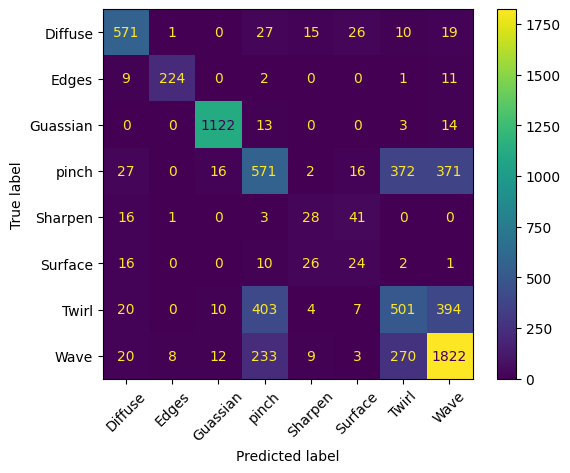

In [11]:
conf_matrix = performance[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()